# Mathematician Who Created the Wonderland
## --a Computational Exploration of Lewis Carroll’s Writing Style 

---
title: "First File"
description: "Testing Quarto"
author: "Jintian He"
date: "07/31/2023"
date-modified: "07/26/2023"
---

## I. Introduction

### 1.1 Project Overview

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
This project is a NLP project on CORGIS CSV Datasets’ Classics csv file extracted from Project Gutenberg (PG). Classics csv is a collection of the top 1000 most popular books and their metadata on PG, as determined by downloads. I perform NLP techniques particularly on  Lewis Carroll's works and compare them with other books in PG to research his writing style and discover other insights. 
</span>    
</span>


### 1.2 Research Question

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
What’s Lewis Carroll’s writing style and what qualities make him unique?
</span>    
</span>

### 1.3 Motivation

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
    Lewis Carroll,the author of <em>Alice’s Adventures in Wonderland</em> and its sequel <em>Through the Looking-Glass</em>, is one of the most well-known children's fantasy writers from the 19th century.  He’s also known by his real name Charles Lutwidge Dodgson, a brilliant mathematician and logician that invented the famous word ladder puzzle and had many significant contributions to the development of Mathematical Logic and Linear Algebra. While we’re astonished by Lewis’ outstanding achievements in both mathematics and literature, we may also want to explore the secret behind his talents–what he thinks about, how he reasons and the way he expresses. Apparently, the most direct key to access such secrets is his books. <br>
    
   
 By reading his book, we’re able to explore the inner world of this great mind and absorb intellectual nutrition from his creations. However, such endeavors could be fairly time-consuming and almost an unbearable burden for nowadays busy people. We then wonder: rather than dig deeply into the depth of Lewis’ writings, is there a more direct way to extract insights of his works or writing style through some analytic efforts? Fortunately, today we have many advanced techniques allowing us to perform such tasks and Natural Language Processing(NLP) is one of the most well-known methods in this field.In this project, I will perform various data analysis techniques, including NLP, on Lewis Carroll’s available works on Gutenberg.org and extract some insights from the analyses attemptedly, through which we can hopefully understand Lewis Carroll’s writing style better. 
</span>
</span>

### 1.4 Prior Related Work

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
Assignment 5–NLP, Assignment 4–web scraping and the other relevant python practices.
</span>    
</span>

## II. Method (Data Explanation + Analytical Process)

### 2.1 Data Importation and Explanation

In [1]:
# Importing classis.csv file. It's avaible on CORGIS for download and in this github repo.
import pandas as pd

file_path = 'classics.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Check if the file is loaded sucessfully
df.head()


,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022


In [2]:
# Checking Missing data
missing_data = df.isnull().sum()

print(missing_data)

bibliography.congress classifications              159
bibliography.languages                               0
bibliography.subjects                              155
bibliography.title                                   0
bibliography.type                                    0
metadata.downloads                                   0
metadata.id                                          0
metadata.rank                                        0
metadata.url                                         0
bibliography.author.birth                            0
bibliography.author.death                            0
bibliography.author.name                             0
bibliography.publication.day                         0
bibliography.publication.full                        0
bibliography.publication.month                       0
bibliography.publication.month name                  0
bibliography.publication.year                        0
metadata.formats.total                               0
metadata.f

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
We observe 159 missing data in "bibliography.congress classifications" column and 155 in "bibliography.subjects" column. Since both variables are not the primary focus of this research, we don't need to further investigate these missing data. <br/>
    <br/>
    We also wonder how many authors are in this dataset?

</span>    
</span>


In [3]:
print("There are", len(df["bibliography.author.name"].unique()), "authors in classics.csv dataset.")

There are 555 authors in classics.csv dataset.


In [4]:
# checking Lewis Carroll related data
df_CL =df[df['bibliography.author.name'] == "Carroll, Lewis"]
df_CL

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
67,"PR,PZ",en,Fantasy,Through the Looking-Glass,Text,3626,12,68,https://www.gutenberg.org/ebooks/12,1832,...,0.087243,0.486645,4.71,15.0,0.07,137377,373,1938,37274.4,29170
183,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,1660,19033,184,https://www.gutenberg.org/ebooks/19033,1832,...,0.030640,0.470152,4.66,16.0,0.06,45325,139,592,12559.5,9721
275,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland: Illustrated ...,Text,1229,28885,276,https://www.gutenberg.org/ebooks/28885,1832,...,0.036749,0.498011,4.71,17.0,0.06,128331,384,1551,35064.9,27270
654,"PR,PZ",de,Fantasy,Alice's Abenteuer im Wunderland,Text,599,19778,655,https://www.gutenberg.org/ebooks/19778,1832,...,0.414417,0.538158,5.39,15.0,0.06,137490,459,1637,34974.9,25515
733,BC,en,"Logic -- Juvenile literature;Logic, Symbolic a...",The Game of Logic,Text,544,4763,734,https://www.gutenberg.org/ebooks/4763,1832,...,0.072815,0.494916,5.48,13.0,0.08,78980,430,1088,18483.3,14408
790,BC,en,"Logic, Symbolic and mathematical",Symbolic Logic,Text,510,28696,791,https://www.gutenberg.org/ebooks/28696,1832,...,0.076662,0.466312,5.59,13.0,0.07,313684,2063,4045,69408.0,56160


<span style="font-size: 20px;">
<span style="line-height: 1.5;">
  We manually examine Lewis Caroll related dataframe since it only has 7 rows/items and there's no missing values in this dataframe. We also notice there's 4 versions of <em> Alice's Adventure in Wonderland </em> and one of them is in Germany. To avoid repetitive analysis on the same book, here we only select <a href="https://www.gutenberg.org/ebooks/11	"><em> Alice's Adventure in Wonderland</em></a> with the higest download.  Subsetting this dataframe to the no-repeat (np) dataframe we need for our detail analysis:
</span>    
</span>

In [5]:
df_CL_np = df_CL.iloc[[0,1, 5, 6]]
df_CL_np

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
67,"PR,PZ",en,Fantasy,Through the Looking-Glass,Text,3626,12,68,https://www.gutenberg.org/ebooks/12,1832,...,0.087243,0.486645,4.71,15.0,0.07,137377,373,1938,37274.4,29170
733,BC,en,"Logic -- Juvenile literature;Logic, Symbolic a...",The Game of Logic,Text,544,4763,734,https://www.gutenberg.org/ebooks/4763,1832,...,0.072815,0.494916,5.48,13.0,0.08,78980,430,1088,18483.3,14408
790,BC,en,"Logic, Symbolic and mathematical",Symbolic Logic,Text,510,28696,791,https://www.gutenberg.org/ebooks/28696,1832,...,0.076662,0.466312,5.59,13.0,0.07,313684,2063,4045,69408.0,56160


<span style="font-size: 20px;">
<span style="line-height: 1.5;">
Each "Plain Text UTF-8" file is stored in its corresponding metadata.url with addtional suffix "/pg{metadata.id}.txt". With this feature we can extract the plain text of these four books by their "metadata.url". Append this to the above dataframe:
</span>    
</span>

In [6]:
metadata_ids = df_CL_np["metadata.id"]
plaintext_urls = []

# Build the plaintext URLs for each book using the metadata.ids
for metadata_id in metadata_ids:
    plaintext_url = f"https://www.gutenberg.org/cache/epub/{metadata_id}/pg{metadata_id}.txt"
    plaintext_urls.append(plaintext_url)
    

In [7]:
# load the text file into objects named by the book title:
import requests

plaintext_urls
titles = df_CL_np["bibliography.title"].tolist()
book_texts = {}
 
for title, url in zip(titles, plaintext_urls):
    response = requests.get(url)
    plain_text = response.text
    book_texts[title] = plain_text

alice = book_texts["Alice's Adventures in Wonderland"]
glass = book_texts["Through the Looking-Glass"]
game = book_texts["The Game of Logic"]
symbolic = book_texts["Symbolic Logic"] 


In [8]:
def count_words(text):
    # Split the text into words using whitespace as the delimiter
    words = text.split()
    # Return the number of words in the text
    return len(words)

# Assuming you have already assigned the text content to variables alice, glass, game, and symbolic

# Count words for each object
alice_word_count = count_words(alice)
glass_word_count = count_words(glass)
game_word_count = count_words(game)
symbolic_word_count = count_words(symbolic)

# Print the word counts
print("Word Count for Alice:", alice_word_count)
print("Word Count for Glass:", glass_word_count)
print("Word Count for Game:", game_word_count)
print("Word Count for Symbolic:", symbolic_word_count)


Word Count for Alice: 29564
Word Count for Glass: 32784
Word Count for Game: 20504
Word Count for Symbolic: 69243


<span style="font-size: 20px;">
<span style="line-height: 1.5;">
By checking the word count for each book and comparing them to the word count in the df_CL_np dataframe, we know our texts are loaded successfully into these objects. These word counts are higher than ones in the df_CL_np dataframe; we haven't precisely tokenized them by words.
</span>    
</span>


### Analytical Process

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
My Analytical Process will be divided into two parts: first, the comparison between Lewis Caroll to the others in the big classics dataset; second, a detail investigation of the features of our selected books from Lewis Carroll.<br/>
    
In the first part, I will perform such comparisons by visualizing my selected variables for the classics dataset and highlighting the same variables in Lewis Carroll's dataframe in their corresponding positions. Visualizations for this part will include histograms with highlighted lines, a scatter-plot with regression line and highlighted points.<br/>

    
</span>    
</span>

## III.Results (data exploration, your findings, and your visuals)

### 3.1 Compare Lewis Carroll to the Big Classics dataset

#### V1.Number of Books per Author (Top 50)

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
Now we move on to fit Lewis Caroll into the "big picture" of the large "classics.csv" dataset and compare him with the others through data analysis. In this process we will also conduct some exploratory data analysis just to learn more about the classic.csv dataset.
</span>    
</span>

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
    Given the popularity of <em> Alice's Adventure in Wonderland </em>, Lewis Caroll is undoubtedly a well-known writer in the field of classical literature. But how popular is he compared to the other authors, measured by the number of available books in the GP project? With the following codes we will performe this analysis. 
</span>    
</span>

In [9]:
# Count # of books in the GP project undedr each author.
author_counts = df["bibliography.author.name"].value_counts()

print(author_counts.describe())
# Print the number of books under each author
print(author_counts)

count    555.000000
mean       1.812613
std        2.447467
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       34.000000
Name: bibliography.author.name, dtype: float64
Unknown                    34
Shakespeare, William       19
Twain, Mark                19
Dickens, Charles           18
Doyle, Arthur Conan        14
                           ..
Herodotus                   1
Burke, Edmund               1
Machen, Arthur              1
Boy Scouts of America       1
Morse, Katharine Duncan     1
Name: bibliography.author.name, Length: 555, dtype: int64


In [10]:
# Find Lewis Carroll rank
Lewis_rank = author_counts.rank(ascending=False).get("Carroll, Lewis", None)
print("Lewis Carroll's Rank:", Lewis_rank)

Lewis Carroll's Rank: 17.0


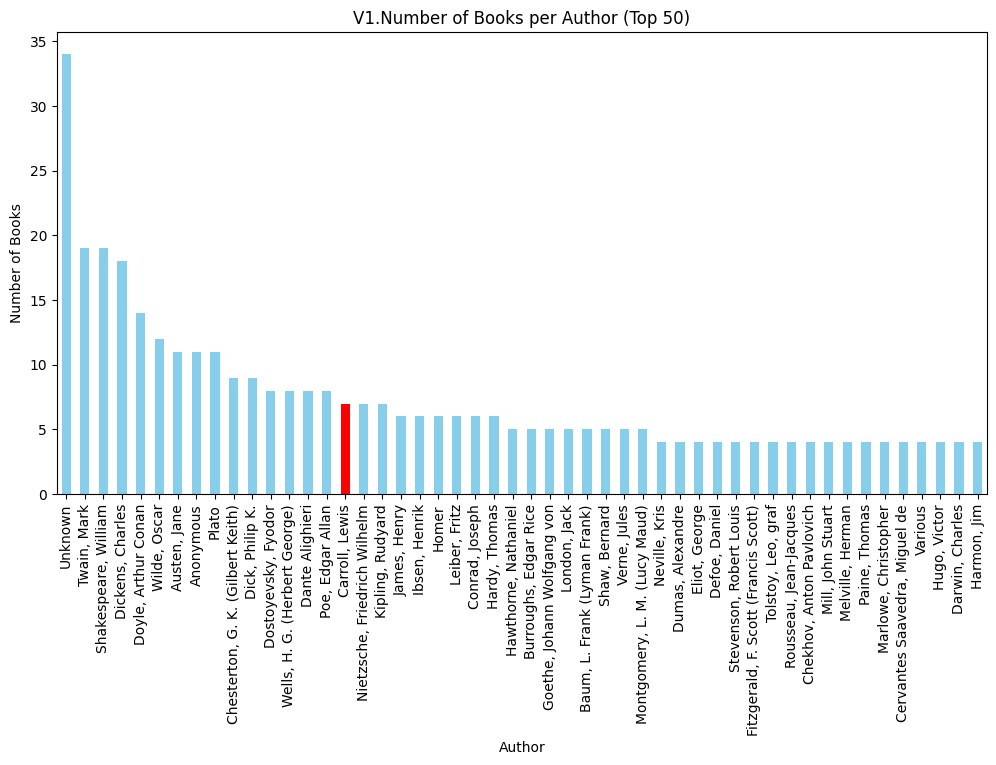

In [11]:
# Visualization1: Visualize Lewis Carroll's rank in the top 50 authors.
import matplotlib.pyplot as plt

# Create a bar plot for the top 50 authors, including Lewis Carroll
top_authors = author_counts.head(50)

# Sort the top authors Series by count in descending order
top_authors = top_authors.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))  # Optional: Adjust the size of the plot
ax = top_authors.plot(kind='bar', color='skyblue')

# Highlight Lewis Carroll's bar with a different color (e.g., red)
lewis_carroll_index = top_authors.index.get_loc("Carroll, Lewis")
ax.patches[lewis_carroll_index].set_facecolor('red')

# Add labels and title
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('V1.Number of Books per Author (Top 50)')

# Display the plot
plt.show()


<span style="font-size: 20px;">
<span style="line-height: 1.5;">
Since there are over 500 authors in the GP project and over 50% of them only have 1 book collected in the project, if we plot  all of their book counts we expect to see a highly right-skewed, less insightful graph. Therefore, it's better to tailor the graph to the top 50 writers and compare Lewis (rank 17) with the others. <br/>
    
In "Number of Books per Author (Top 50)", Lewis is highlighted by the red color. Authors before him are also well-known writers like "Mark Twain, "Shakespeare", "Oscar Wilde", "Jane Austen" and etc.We should notice the genre of their works can be quite different: for example, "Mark Twain" like to write short novels and "Shakespear" writes lots of poems and dramas; these, given their short length, may increase their authors' book count. We also notice many books fall into names of "Unknown" and "Anonymous", which should be ignored from this graph since they're not correctly defined. After these modifications, we can conclude Lewis Carroll is a very popular writer even among the top 50 writers in the GP project.  
</span>    
</span>

####  V2.Correlation between Subjectivity and Polarity

---
<span style="font-size: 20px;">
<span style="line-height: 1.5;">
 Next, we want to perform an analysis on the sentiment analysis scores of Lewis and the others and research the relationship between sentiment subjectivity and sentiment polarity.We also want to know where Lewis sits in the big picture of the GPD project sentiment scores.
</span>    
</span>

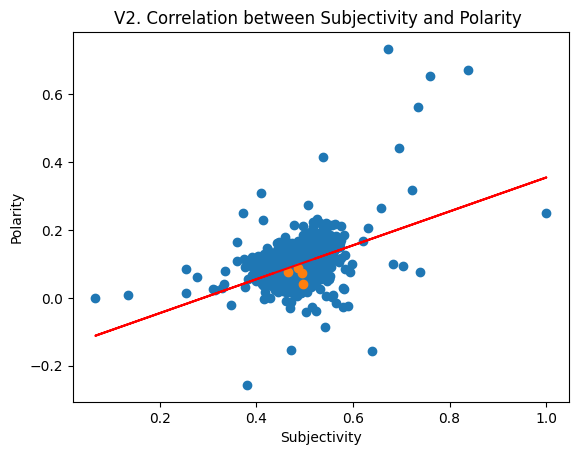

The slope of this graph is  [0.49959358]


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df["metrics.sentiments.subjectivity"]
y = df["metrics.sentiments.polarity"]

x_lewis = df_CL_np["metrics.sentiments.subjectivity"]
y_lewis = df_CL_np["metrics.sentiments.polarity"]

# Create a scatter plot for the others
plt.scatter(x, y, label = "others")
# Create a scatter plot for lewis
plt.scatter(x_lewis, y_lewis, label = "Lewis")

# Add labels and title
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('V2. Correlation between Subjectivity and Polarity ')

# fit regression for the others
lm = LinearRegression()
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
lm.fit(x,y )
# Get the coefficients of the linear model for the others
slope = lm.coef_[0]
intercept = lm.intercept_
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')


# Show the plot
plt.show()

print("The slope of this graph is ",slope)

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
As CORGIS database describes, "Subjectivity (as opposed to Objectivity) in particular refers to whether the text is opinionated or attempts to stay factual" and "Polarity in particular refers to how positive or negative the author is towards the content". Through plotting them in the same scatter plot, we attempt to find if the more subjective an author is in his/her writing, the more positive will the overall attitude of the book be. <br/>
    
In this graph, we identify a positive relation between the sentiment subjectivity and sentiment polarity with a slope of 0.4995. We infer there's a possibility that the more subjective an author is, the more positive this will be in his attitude towards his works. <br/>

We also view the majority of data points concentrated within the 0.4-06 subjectivity range for x-axis and the 0.0-0.2 polarity range for y-axis. Lewis Caroll locates in the center of this cluster, indicating he has an overall subjective tone and a positive choice of words in his writings.

</span>    
</span>

#### V3.Average sentence length

---

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
What about Lewis' average sentence length compared to the other writers? Does he prefer to write in short or long sentences?
This is also an important factor that influences one's writing style. From our experience, we can tell that generally short sentences provide better readability while the long sentences require the reader to be more concentrated and skillful in reading. So does Lewis try to better engage his audience with shorter sentences or make his works more readible?
</span>    
</span>


In [13]:
print(df_CL_np["metrics.statistics.average sentence length"])
print(df["metrics.statistics.average sentence length"].describe())

2      17.0
67     15.0
733    13.0
790    13.0
Name: metrics.statistics.average sentence length, dtype: float64
count    1006.000000
mean       20.801193
std        10.740644
min         5.000000
25%        15.000000
50%        19.000000
75%        24.000000
max       235.000000
Name: metrics.statistics.average sentence length, dtype: float64


<span style="font-size: 20px;">
<span style="line-height: 1.5;">
We extract the average sentence length for four unique books in our Lewis Carroll  dataframe. Then we add a five number description to the big classics dataframe on its average sentence length variable. We also visualize Lewis' average sentence length together with the others':
</span>    
</span>

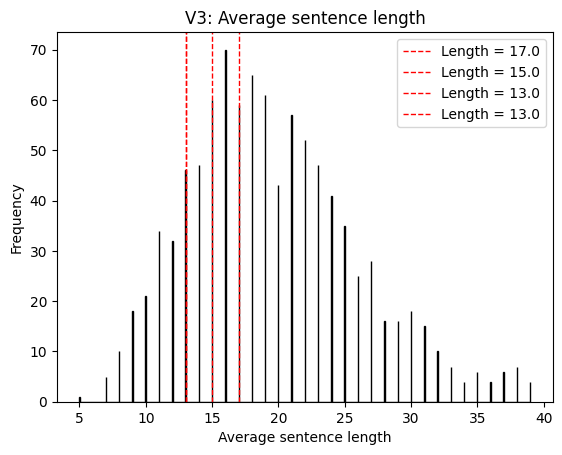

In [14]:
dt_sentence_length = df['metrics.statistics.average sentence length']
cl_sentence_length = df_CL_np["metrics.statistics.average sentence length"]

plt.hist(dt_sentence_length[dt_sentence_length <40], bins = len(dt_sentence_length) ,edgecolor='black')

# Add labels and title
plt.xlabel('Average sentence length')
plt.ylabel('Frequency')
plt.title('V3: Average sentence length')

# Display the histogram
for length in cl_sentence_length:
    plt.axvline(length, color='red', linestyle='dashed', linewidth=1, label=f'Length = {length}')

# Display the histogram
plt.legend()
plt.show()

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
In this graph, we observe 16 words/sentences is the most popular length for authors in the GP project. The graph is relatively right-skewed, meaning most writers prefer short-medium average sentence length in the first to the third quantile. Lewis' books have shorter average sentences length than the average (mean = 20.801), all falling in between 0% to 50%. This might indicate Lewis prefers to write shorter sentence structure to engage his reader better. 
</span>    
</span>

####  V4.Readability index

---
<span style="font-size: 20px;">
<span style="line-height: 1.5;">
To confirm our findings in our 3rd visualization, in the final step of our data analysis of comparing Lewis to the entire Classics dataframe, we will visualize the "metrics.difficulty.automated readability index" for all the books in GP project and highlight Lewis Caroll's readability indexs with red color.
</span>    
</span>

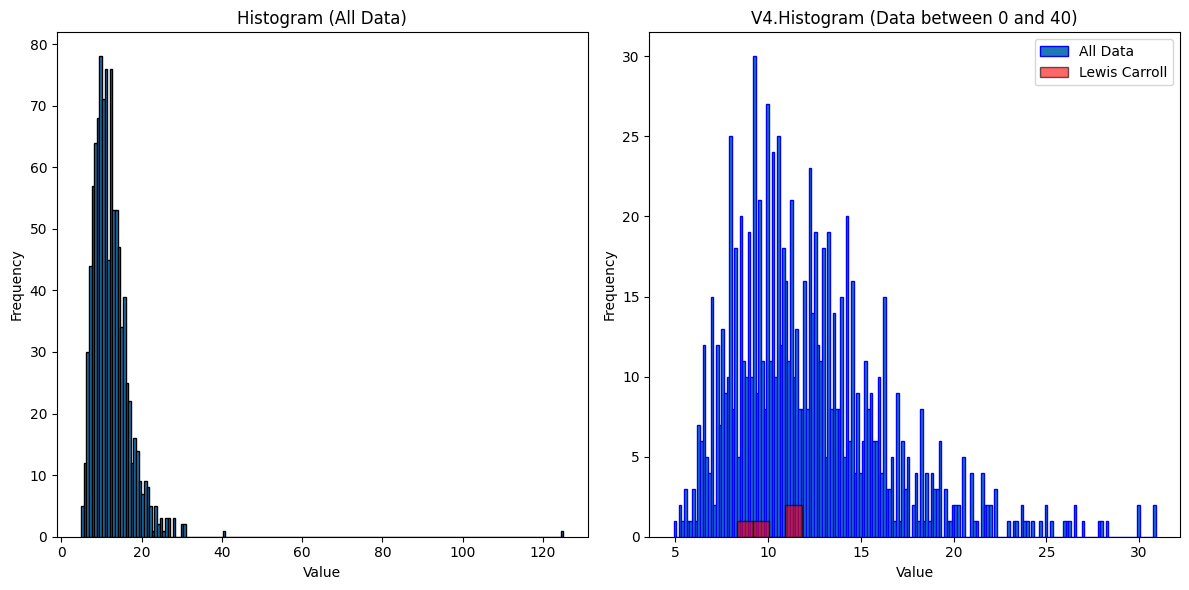

readability index of Lewis Carroll  2       9.3
67      8.3
733    11.0
790    11.8
Name: metrics.difficulty.automated readability index, dtype: float64


In [15]:
data = df["metrics.difficulty.automated readability index"]
data_lewis = df_CL_np["metrics.difficulty.automated readability index"]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of the unfiltered data in the first subplot
ax1.hist(data, bins=len(data.unique()), edgecolor='black')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram (All Data)')

# Filter the data between 0 and 100
data_filtered = data[(data >= 0) & (data <= 40)]

# Plot the histogram of the filtered data in the second subplot
ax2.hist(data_filtered, bins=len(data_filtered.unique()), edgecolor='blue')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('V4.Histogram (Data between 0 and 40)')

# Plot Lewis Carroll's data on the second subplot
ax2.hist(data_lewis, bins=len(data_lewis.unique()), color='red', alpha=0.6, edgecolor='black')
ax2.legend(['All Data',  'Lewis Carroll'])

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display the histograms
plt.show()

print ("readability index of Lewis Carroll ",data_lewis)

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
Since we observe the untailored plot has an outlier (>120) that stretches the whole graph to the right and reduces the interpretability of our visualization, we decide to tailor the data between 0 and 40 since the vast majority of data fall into this range. <br/>
    
Based on CORGIS database' description, "The Automated Readability Index is a number indicating the understandability of the text. This number is an approximate US Grade Level needed to comprehend the text, calculated using the characters per word and words per sentences." For example, if a book has 11 as its readability index, this means it's readable for an 11th grader. <br/>

As said, we also highlight Lewis' readability score in the second (the better) graph, by which we can see his readability indexes land on the lower side, which indicates his works are readable for young readers in middle/high school (7th grade- 12 grade).
</span>    
</span>

###  3.2 Detail Analysis of Lewis' Books

#### Data Processing 

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
To further process our data, we download necessary packages like nltk, matplotlib, requests.
</span>    
</span>

In [16]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
We then extract the contents for our four selected books. We also import english stops as a python list from nltk.corpus package and analyzer from vader package for later use. Once we obtain string objects for each book, we tokenize each of them and remove stop words from them. 
</span>    
</span>

In [17]:
# Extract Contents for four books
alice = alice.split('START OF THE PROJECT GUTENBERG EBOOK')[1]
alice = alice.split('END OF THE PROJECT GUTENBERG EBOOK')[0]
alice = alice.lower()

glass = glass.split('START OF THE PROJECT GUTENBERG EBOOK')[1]
glass = glass.split('END OF THE PROJECT GUTENBERG EBOOK')[0]
glass = glass.lower()

game = game.split('START OF THE PROJECT GUTENBERG EBOOK')[1]
game = game.split('END OF THE PROJECT GUTENBERG EBOOK')[0]
game = game.lower()

# Pay attention to the inconsistency of the starting marks GP uses. They alter.
symbolic = symbolic.split('START OF THIS PROJECT GUTENBERG EBOOK SYMBOLIC LOGIC')[1] 
symbolic = symbolic.split('START OF THIS PROJECT GUTENBERG EBOOK SYMBOLIC LOGIC')[0]
symbolic = symbolic.lower()

In [18]:
# a Python list of stopwords
stop_words = stopwords.words('english')
# a variable for using VADER's SentimentIntensityAnalyzer
analyzer = vader.SentimentIntensityAnalyzer()

In [19]:
# Tokenize four books
alice_words = word_tokenize(alice)
glass_words = word_tokenize(glass)
game_words = word_tokenize(game)
symbolic_words = word_tokenize(symbolic)

In [20]:
# Remove stop words
alice_words_no_stopwords = [word for word in alice_words if word not in stop_words]
glass_words_no_stopwords = [word for word in glass_words if word not in stop_words]
game_words_no_stopwords = [word for word in game_words if word not in stop_words]
symbolic_words_no_stopwords = [word for word in symbolic_words if word not in stop_words]

#### V5.Wordcloud

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
After completing the above data processing steps, we are ready to create word clouds for each book. Through these word clouds, we can grasp the most frequently appeared words in each book and potentially their themes or subjects.
</span>    
</span>

In [21]:
# No repeated words by converting each list to a set and then back to a list and no stop words
alice_words_nr = list(set(alice_words_no_stopwords))
glass_words_nr = list(set(glass_words_no_stopwords))
game_words_nr = list(set(game_words_no_stopwords))
symbolic_words_nr = list(set(symbolic_words_no_stopwords))

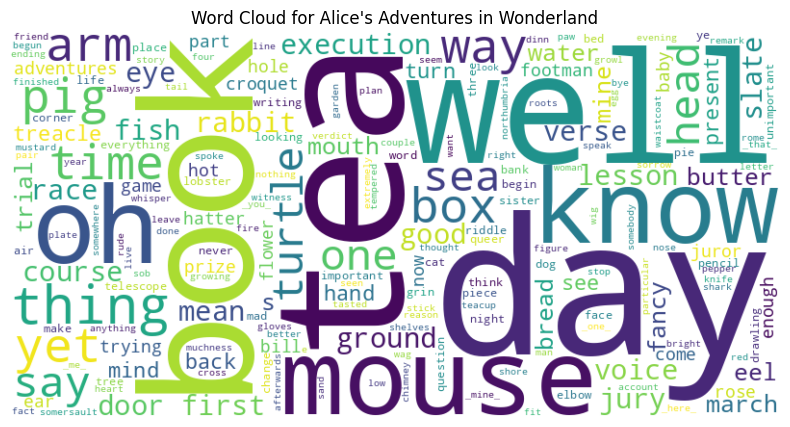

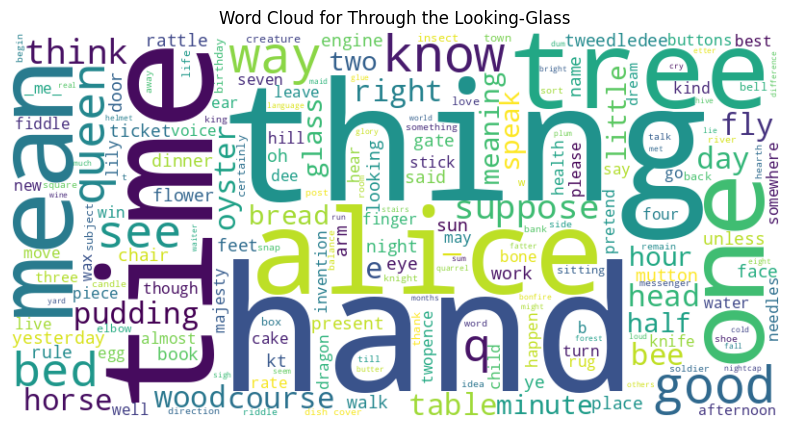

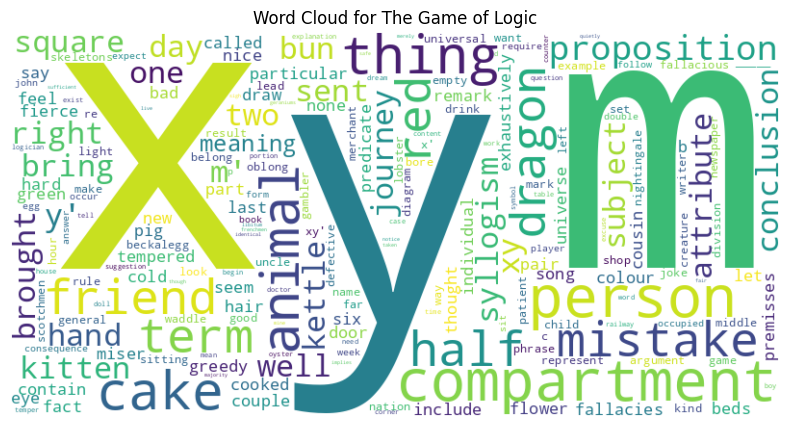

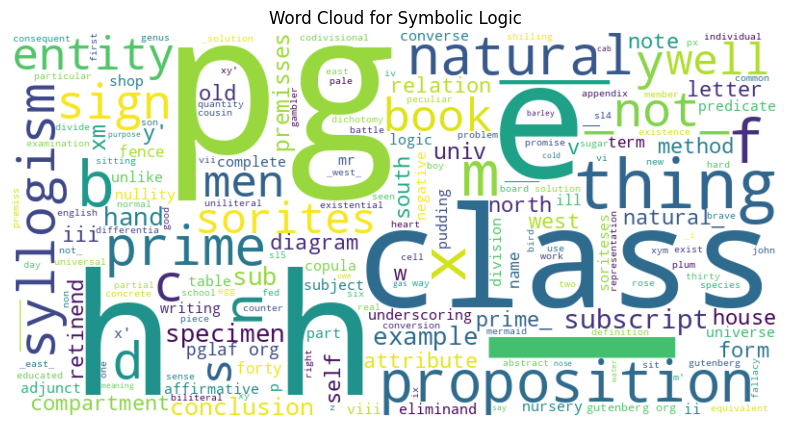

In [22]:
from wordcloud import WordCloud

# Assuming 'alice_words', 'glass_words', 'game_words', and 'symbolic_words' are the tokenized word lists.

def generate_word_cloud(book_title, word_list):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {book_title}')
    plt.show()

# Generate word clouds for each book
generate_word_cloud("Alice's Adventures in Wonderland", alice_words_nr)
generate_word_cloud("Through the Looking-Glass", glass_words_nr)
generate_word_cloud("The Game of Logic", game_words_nr)
generate_word_cloud("Symbolic Logic", symbolic_words_nr)


<span style="font-size: 20px;">
<span style="line-height: 1.5;">
    As we look through the word clouds for each graph, we do realize they are different by their subjects. The first two word clouds look similar with many identical words like "alice", "thing", "rabbit", "door" because both books--<em> Alice's Adventure in Wonderland </em>   and <em>Through the Looking-Glass</em>--are storybook about the same protagonist Alice's adventures. <br/>
    
The later two books all fall into the "Logic" subject. Therefore, we can see many similar terms about logic frequently appear in these two books, such as "x", "syllogism", "conclusion", "proposition" and etc.

</span>    
</span>



#### V6. & V7. Sentiment Analysis on Lewis' Fantasy books.

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
Although word clouds reflect the most frequently appeared words in these books and disclose their themes to an extent, this technique still has its own limits, such as being too generalized and unable to describe the mood behind the words.

To complement the limits of a NLP technique, we usually use other NLP techniques to cover the areas it doesn't explain. In my case, I'll use sentiment analysis of positive and negative words to more precisely reflect Lewis Carroll's writing style in Fantasy and Logic topics.


</span>    
</span>

In [23]:
# Create lists to store positive and negative words
alice_ns_positive_words = []
alice_ns_negative_words = []

# Iterate over the Macbeth word list and check the compound score of each word
for word in alice_words_no_stopwords:
    # Get the sentiment scores for the word
    scores = analyzer.polarity_scores(word)
    
    # Check if the compound score is positive, negative, or neutral (compound = 0)
    if scores['compound'] > 0:
        alice_ns_positive_words.append(word)
    elif scores['compound'] < 0:
        alice_ns_negative_words.append(word)

In [24]:
# Get the 15 most common negative and positive words in alice
top_15_alice_ns_negative_words= nltk.FreqDist(alice_ns_negative_words).most_common(15)
top_15_alice_ns_positive_words = nltk.FreqDist(alice_ns_positive_words).most_common(15)

In [25]:
# Create lists to store positive and negative words
glass_ns_positive_words = []
glass_ns_negative_words = []

# Iterate over the Macbeth word list and check the compound score of each word
for word in glass_words_no_stopwords:
    # Get the sentiment scores for the word
    scores = analyzer.polarity_scores(word)
    
    # Check if the compound score is positive, negative, or neutral (compound = 0)
    if scores['compound'] > 0:
        glass_ns_positive_words.append(word)
    elif scores['compound'] < 0:
        glass_ns_negative_words.append(word)
    
#----------
# Get the 15 most common negative and positive words in alice
top_15_glass_ns_negative_words= nltk.FreqDist(glass_ns_negative_words).most_common(15)
top_15_glass_ns_positive_words = nltk.FreqDist(glass_ns_positive_words).most_common(15)


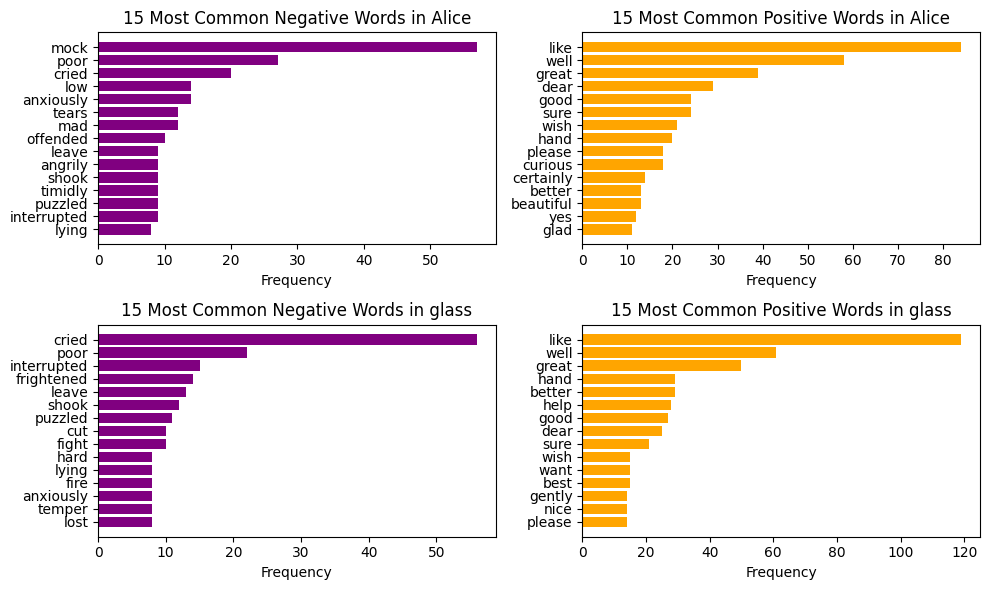

In [26]:
#----------------------
# Create horizontal bar plots
plt.figure(figsize=(10, 6))
# Plot for negative words
plt.subplot(2, 2, 1)
plt.barh(range(len(top_15_alice_ns_negative_words[::-1])), [count for word, count in top_15_alice_ns_negative_words[::-1]], align='center',color='purple')
plt.yticks(range(len(top_15_alice_ns_negative_words[::-1])), [word for word, count in top_15_alice_ns_negative_words[::-1]])
plt.xlabel('Frequency')
plt.title('15 Most Common Negative Words in Alice')

# Plot for positive words
plt.subplot(2, 2, 2)
plt.barh(range(len(top_15_alice_ns_positive_words[::-1])), [count for word, count in top_15_alice_ns_positive_words[::-1]], align='center',color='orange')
plt.yticks(range(len(top_15_alice_ns_positive_words[::-1])), [word for word, count in top_15_alice_ns_positive_words[::-1]])
plt.xlabel('Frequency')
plt.title('15 Most Common Positive Words in Alice')

# Plot for negative words
plt.subplot(2, 2, 3)
plt.barh(range(len(top_15_glass_ns_negative_words[::-1])), [count for word, count in top_15_glass_ns_negative_words[::-1]], align='center',color='purple')
plt.yticks(range(len(top_15_glass_ns_negative_words[::-1])), [word for word, count in top_15_glass_ns_negative_words[::-1]])
plt.xlabel('Frequency')
plt.title('15 Most Common Negative Words in glass')

# Plot for positive words
plt.subplot(2, 2, 4)
plt.barh(range(len(top_15_glass_ns_positive_words[::-1])), [count for word, count in top_15_glass_ns_positive_words[::-1]], align='center',color='orange')
plt.yticks(range(len(top_15_glass_ns_positive_words[::-1])), [word for word, count in top_15_glass_ns_positive_words[::-1]])
plt.xlabel('Frequency')
plt.title('15 Most Common Positive Words in glass')

plt.tight_layout()
plt.show()

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
As we compare the 15 most frequently used positive words in Lewis' two fantasy books <em> Alie's Adventure in Wonderland</em> and <em> Through the Looking-Glass</em>, we find Lewis' uses of positive words in his fantasy writing are very similar and have many overlaps across books. Words such as "like", "well", "great","good", "wish" all ranked high in these lists. <br/>

Looking into the 15 most frequently used negative words, we find although there are some overlapping words like "lying" and "poor", the overall feeling is way more different than the homogeneousness we sense from the positive word lists. Based on this we can infer Lewis may set different challenges for Alice across two books with different use of negative words. 
</span>    
</span>

<span style="font-size: 20px;">
<span style="line-height: 1.5;">


</span>    
</span>

In [27]:
# Create lists to store positive and negative words
game_ns_positive_words = []
game_ns_negative_words = []

# Iterate over the Macbeth word list and check the compound score of each word
for word in game_words_no_stopwords:
    # Get the sentiment scores for the word
    scores = analyzer.polarity_scores(word)
    
    # Check if the compound score is positive, negative, or neutral (compound = 0)
    if scores['compound'] > 0:
        game_ns_positive_words.append(word)
    elif scores['compound'] < 0:
        game_ns_negative_words.append(word)
    
#----------
# Get the 15 most common negative and positive words in alice
top_15_game_ns_negative_words= nltk.FreqDist(game_ns_negative_words).most_common(15)
top_15_game_ns_positive_words = nltk.FreqDist(game_ns_positive_words).most_common(15)


In [28]:
# Create lists to store positive and negative words
symbolic_ns_positive_words = []
symbolic_ns_negative_words = []

# Iterate over the Macbeth word list and check the compound score of each word
for word in symbolic_words_no_stopwords:
    # Get the sentiment scores for the word
    scores = analyzer.polarity_scores(word)
    
    # Check if the compound score is positive, negative, or neutral (compound = 0)
    if scores['compound'] > 0:
        symbolic_ns_positive_words.append(word)
    elif scores['compound'] < 0:
        symbolic_ns_negative_words.append(word)
    
#----------
# Get the 15 most common negative and positive words in alice
top_15_symbolic_ns_negative_words= nltk.FreqDist(symbolic_ns_negative_words).most_common(15)
top_15_symbolic_ns_positive_words = nltk.FreqDist(symbolic_ns_positive_words).most_common(15)


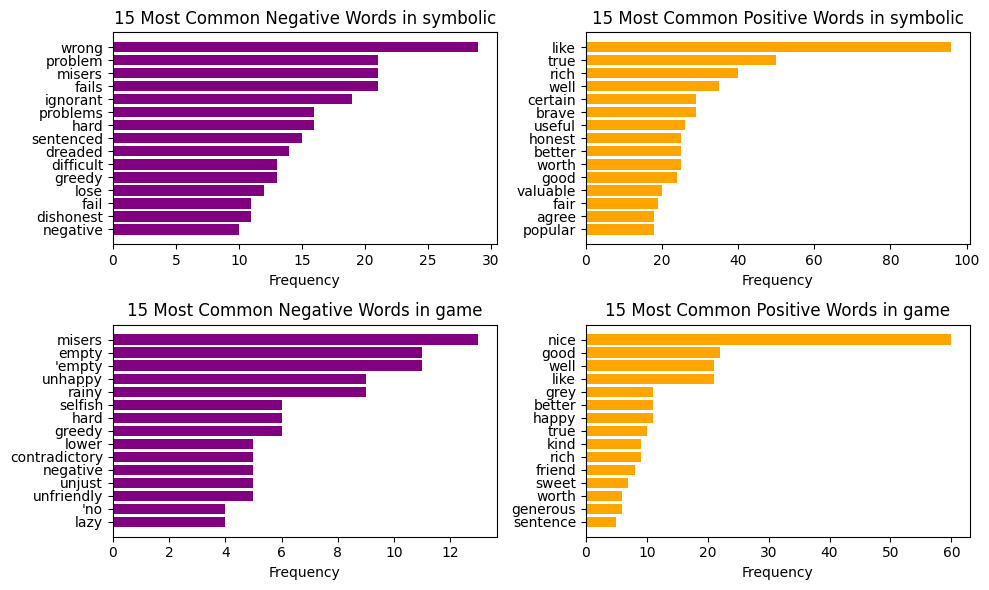

In [29]:
#----------------------
# Create horizontal bar plots
plt.figure(figsize=(10, 6))

# Plot for negative words
plt.subplot(2, 2, 1)
plt.barh(range(len(top_15_symbolic_ns_negative_words[::-1])), [count for word, count in top_15_symbolic_ns_negative_words[::-1]], align='center',color='purple')
plt.yticks(range(len(top_15_symbolic_ns_negative_words[::-1])), [word for word, count in top_15_symbolic_ns_negative_words[::-1]])
plt.xlabel('Frequency')
plt.title('15 Most Common Negative Words in symbolic')

# Plot for positive words
plt.subplot(2, 2, 2)
plt.barh(range(len(top_15_symbolic_ns_positive_words[::-1])), [count for word, count in top_15_symbolic_ns_positive_words[::-1]], align='center',color='orange')
plt.yticks(range(len(top_15_symbolic_ns_positive_words[::-1])), [word for word, count in top_15_symbolic_ns_positive_words[::-1]])
plt.xlabel('Frequency')
plt.title('15 Most Common Positive Words in symbolic')

# Plot for negative words
plt.subplot(2, 2, 3)
plt.barh(range(len(top_15_game_ns_negative_words[::-1])), [count for word, count in top_15_game_ns_negative_words[::-1]], align='center',color='purple')
plt.yticks(range(len(top_15_game_ns_negative_words[::-1])), [word for word, count in top_15_game_ns_negative_words[::-1]])
plt.xlabel('Frequency')
plt.title('15 Most Common Negative Words in game')

# Plot for positive words
plt.subplot(2, 2, 4)
plt.barh(range(len(top_15_game_ns_positive_words[::-1])), [count for word, count in top_15_game_ns_positive_words[::-1]], align='center',color='orange')
plt.yticks(range(len(top_15_game_ns_positive_words[::-1])), [word for word, count in top_15_game_ns_positive_words[::-1]])
plt.xlabel('Frequency')
plt.title('15 Most Common Positive Words in game')

plt.tight_layout()
plt.show()

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
Regarding Lewis Logic book writing, we found similar patterns exist in his fantasy books.  Lewis prefers to use positive words from the same group to express an uplifting tone, while he uses different negative words to accurately describe different qualities or negations.
</span>    
</span>

#### V8.Polarity Analysis


In [30]:
# Split Alice's Adventure in Wonderland by chapters.
import re
# Define the regular expression pattern to match chapter headings
alice_chapter_pattern = r"\bCHAPTER\b"

# Split the text into chapters based on the pattern
alice_chapters = re.split(alice_chapter_pattern, alice, flags=re.IGNORECASE)

# remove the first 1 (content before table of content)+12 (table of content)
alice_chapters = alice_chapters[13:]

# Initialize lists to store chapter numbers and sentiment scores
alice_chapter_numbers = []
alice_sentiment_scores = []

# Iterate over the chapters in Alice's Adventures in Wonderland
for i, chapter_text in enumerate(alice_chapters, 1):
    # Tokenize the chapter's text into words
    words = nltk.word_tokenize(chapter_text)
    
    # Calculate the total chapter sentiment score by summing the compound scores of all the words in that chapter
    chapter_score = sum(analyzer.polarity_scores(word)["compound"] for word in words)
    
    # Append chapter number and sentiment score to the respective lists
    alice_chapter_numbers.append(i)
    alice_sentiment_scores.append(chapter_score)

In [31]:
print(len(alice_chapter_numbers))
print(len(alice_sentiment_scores))


12
12


In [32]:
# chapter extraction for glass

# Define the regular expression pattern to match chapter headings
glass_chapter_pattern = r"\bCHAPTER\b"

# Split the text into chapters based on the pattern
glass_chapters = re.split(glass_chapter_pattern, glass, flags=re.IGNORECASE)

# remove the first 1 (content before table of content)+12 (table of content)
glass_chapters = glass_chapters[13:]

#---------------------------------------
# Initialize lists to store chapter numbers and sentiment scores
glass_chapter_numbers = []
glass_sentiment_scores = []

# Iterate over the chapters in through the looking glass
for i, chapter_text in enumerate(glass_chapters, 1):
    # Tokenize the chapter's text into words
    words = nltk.word_tokenize(chapter_text)
    
    # Calculate the total chapter sentiment score by summing the compound scores of all the words in that chapter
    chapter_score = sum(analyzer.polarity_scores(word)["compound"] for word in words)
    
    # Append chapter number and sentiment score to the respective lists
    glass_chapter_numbers.append(i)
    glass_sentiment_scores.append(chapter_score)


In [33]:
print(len(glass_chapter_numbers))
print(len(glass_sentiment_scores))


12
12


In [34]:
# chapter extraction for game
# Define the regular expression pattern to match chapter headings
game_chapter_pattern = r"\bCHAPTER\b"

# Split the text into chapters based on the pattern
game_chapters = re.split(game_chapter_pattern, game, flags=re.IGNORECASE)

# remove the first 1 (content before table of content)+12 (table of content)
game_chapters = game_chapters[2:]

#---------------------------------------
# Initialize lists to store chapter numbers and sentiment scores
game_chapter_numbers = []
game_sentiment_scores = []

# Iterate over the chapters in Alice's Adventures in Wonderland
for i, chapter_text in enumerate(game_chapters, 0):
    # Tokenize the chapter's text into words
    words = nltk.word_tokenize(chapter_text)
    
    # Calculate the total chapter sentiment score by summing the compound scores of all the words in that chapter
    chapter_score = sum(analyzer.polarity_scores(word)["compound"] for word in words)
    
    # Append chapter number and sentiment score to the respective lists
    game_chapter_numbers.append(i)
    game_sentiment_scores.append(chapter_score)
#-----------------------------------

In [35]:
print(len(game_chapter_numbers))
print(len(game_sentiment_scores))


4
4


In [36]:
# Chapter Extraction for symbolic

# Define the regular expression pattern to match chapter headings
symbolic_chapter_pattern = r"\bCHAPTER\b"

# Split the text into chapters based on the pattern
symbolic_chapters = re.split(symbolic_chapter_pattern, symbolic, flags=re.IGNORECASE)

# remove the first 1 (content before table of content)+12 (table of content)
symbolic_chapters = symbolic_chapters[1:]

#---------------------------------------
# Initialize lists to store chapter numbers and sentiment scores
symbolic_chapter_numbers = []
symbolic_sentiment_scores = []

# Iterate over the chapters in Alice's Adventures in Wonderland
for i, chapter_text in enumerate(symbolic_chapters, 0):
    # Tokenize the chapter's text into words
    words = nltk.word_tokenize(chapter_text)
    
    # Calculate the total chapter sentiment score by summing the compound scores of all the words in that chapter
    chapter_score = sum(analyzer.polarity_scores(word)["compound"] for word in words)
    
    # Append chapter number and sentiment score to the respective lists
    symbolic_chapter_numbers.append(i)
    symbolic_sentiment_scores.append(chapter_score)


In [37]:
print(len(symbolic_chapter_numbers))
print(len(symbolic_sentiment_scores))


62
62


In [38]:
# Example lists
list1 = [1, 2, 3]
list2 = [4, 5, 6]
list3 = [7, 8, 9]

# Combine all lists into one vector using a loop
combined_list = []
for lst in [list1, list2, list3]:
    combined_list.extend(lst)

print(combined_list)


[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [39]:
sentiment_scores = [alice_sentiment_scores,glass_sentiment_scores,game_sentiment_scores,symbolic_sentiment_scores]
combined_list = []
for score in sentiment_scores:
    combined_list.extend(score)


[9.590500000000002, 6.304400000000002, 9.064600000000008, 13.2118, 3.5087000000000024, 5.3100000000000005, 4.941000000000002, 6.0459, -3.1251999999999955, 10.476700000000001, 2.5824000000000016, 2.535399999999999, 12.669600000000008, 17.681499999999996, 20.522800000000004, 13.699000000000021, 23.6025, 32.70139999999999, 12.393300000000007, 24.61990000000001, 11.689600000000004, -0.5766, 0.0, 9.765900000000004, 10.095300000000112, -10.526699999999993, -18.835899999999967, 8.473900000000004, 0.0, -0.1531, -3.0889, 1.2140000000000002, 6.385199999999999, 0.0, 0.0, 0.0, 0.0, 0.0, -0.296, 0.0, -0.296, 0.2732, 0.0516, -2.9827999999999997, 0.0, 0.0, -0.8879999999999999, 0.0516, 0.0, 0.0, -0.4019, 0.0, -0.8879999999999999, 0.9981, -0.3818, -0.0837, 0.0, 0.0, 0.5337000000000001, -0.296, 2.0790000000000006, 1.7135, 1.3765999999999998, 2.9975, 1.3971, 2.4674000000000014, 5.6193, 0.5464, 0.4012, 4.4626, 0.0, 2.2735000000000003, -23.96019999999997, -0.12869999999999998, -0.5753999999999997, 0.2732, 

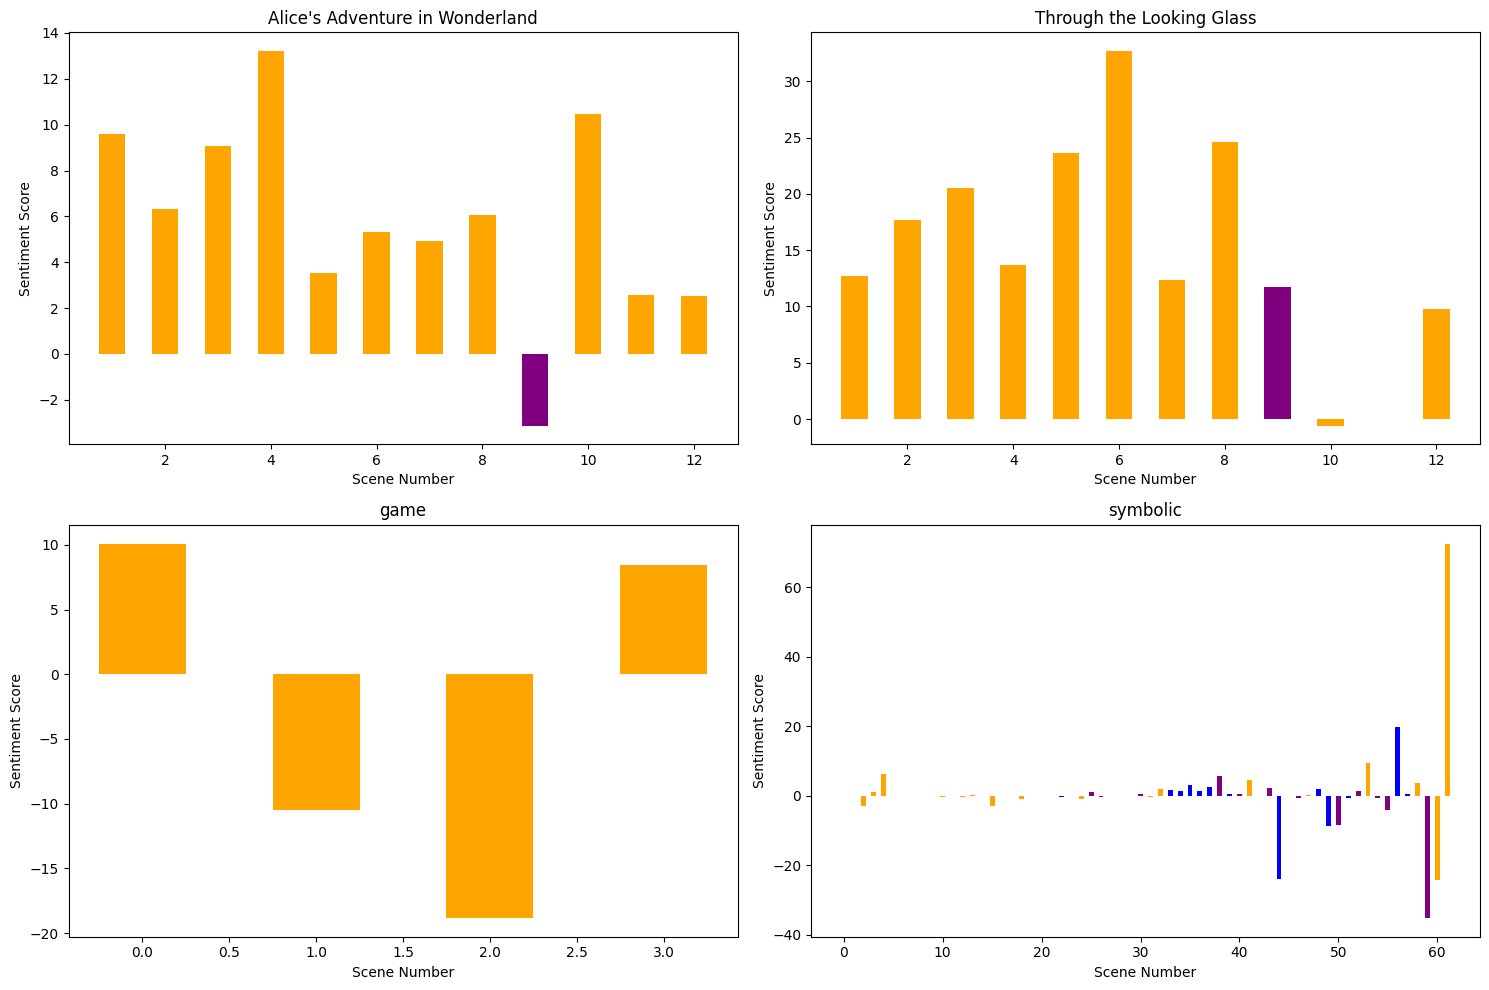

In [40]:
# Set colors for positive, negative, and neutral scores

colors = ['purple' if score < 0 else 'orange' if score > 0 else 'blue' for score in combined_list]
bar_width = 0.5

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the first subplot for "Alice's Adventure in Wonderland"
axes[0, 0].bar(alice_chapter_numbers, alice_sentiment_scores, color=colors, width=bar_width)
axes[0, 0].set_xlabel("Scene Number")
axes[0, 0].set_ylabel("Sentiment Score")
axes[0, 0].set_title("Alice's Adventure in Wonderland")

# Plot the second subplot for "Through the Looking Glass"
axes[0, 1].bar(glass_chapter_numbers, glass_sentiment_scores, color=colors, width=bar_width)
axes[0, 1].set_xlabel("Scene Number")
axes[0, 1].set_ylabel("Sentiment Score")
axes[0, 1].set_title("Through the Looking Glass")

# Plot the third subplot for "game"
axes[1, 0].bar(game_chapter_numbers, game_sentiment_scores, color=colors, width=bar_width)
axes[1, 0].set_xlabel("Scene Number")
axes[1, 0].set_ylabel("Sentiment Score")
axes[1, 0].set_title("game")

# Plot the fourth subplot for "symbolic"
axes[1, 1].bar(symbolic_chapter_numbers, symbolic_sentiment_scores, color=colors, width=bar_width)
axes[1, 1].set_xlabel("Scene Number")
axes[1, 1].set_ylabel("Sentiment Score")
axes[1, 1].set_title("symbolic")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<span style="font-size: 20px;">
<span style="line-height: 1.5;">
As we visualize the polarity scores of Lewis' four books, we identify he always hold a positive tone in his fantasy books but write more objectively (close to 0 score) or uses strong negations in his logic books. My assumption is in the logic book, since negations or counter examples are freuqently use as parts of the proof, it results an overall lower sentiment score for this type of books.
</span>    
</span>

## IV.Discussion

what does your analysis show, what is the big picture, and how are these findings useful?

Based on the above analysis, I'm able to conclude some uniqueness of Lewis Caroll few features I discover his writing style:
1. Lewis Caroll is a very popular (ranked as 17th) writer over 555 writers collected in the GP project.
2. He tends to be subjective in his writing with an overall positive attitude.
3. He prefers to write in short sentences, lower than the overall average sentence length in the GP project.
4. His works are usually easy to read, even for the 7th-12th grader.
5. Given he's both a Mathematician and a fantasy writer, to create engaging works in both fields for different types of readers, Lewis approaches his writings with different tones. For his fantasy writings, he tends to use many positive words and holds a constant positive tone throughout the books. But for his logic books, he tends to be more critical and objective by using more negative or neutral words.
6. His choices of positive words are very similar across his fantasy books while the negative words are different to represent the varying adventure his protagonist--Alice--experiences. Similar patent is found in his logic writings: similar choices of positive words, different negative words to express varying negations and qualities.

<span style="font-size: 20px;">
<span style="line-height: 1.5;">
These findings are useful for us to better understand Lewis Carroll's writing style and are presentable for educational purposes. I think they will be very helpful literature teachers who want to incorporate Digital Humanity methods into his/her lecture and introduce Lewis Carroll from a computational angle. For Lewis' reader, these findings are also useful as you can examine them in your reading of Lewis' works and make comparisons. Although some of them are proved to be not true, in your process of validation--finding the right features about Lewis from the text--you still learn more than reading his texts passively. I think these are the benefits offered by my findings.
</span>    
</span>